In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [48]:
#mode = 'treatment' 
mode = 'death'
#visualize_mode = 'success_without_death_etaw' 
visualize_mode = 'death_etaw_1208'

In [49]:
# Read all the csv files in the folders: opt_metrics, naive_metrics
# and store them in a list
opt_metrics = []
naive_metrics = []

# Get all the file names in the folder opt_metrics
opt_metrics_files = os.listdir('opt_metrics')
naive_metrics_files = os.listdir('naive_metrics')

# Read all the csv files in the folder opt_metrics
for file in opt_metrics_files:
    if 'metrics' in file:
        if visualize_mode:
            opt_metrics.append(pd.read_csv(f'opt_metrics/{visualize_mode}/'+file, index_col=0))
        else:
            opt_metrics.append(pd.read_csv('opt_metrics/'+file, index_col=0))

# Read all the csv files in the folder naive_metrics
for file in naive_metrics_files:
    if 'metrics' in file:
        if visualize_mode:
            naive_metrics.append(pd.read_csv(f'naive_metrics/{visualize_mode}/'+file, index_col=0))
        else:
            naive_metrics.append(pd.read_csv('naive_metrics/'+file, index_col=0))

In [50]:
os.listdir('opt_metrics')

['metrics_df_opt_180.csv',
 'metrics_df_opt_160.csv',
 'metrics_df_opt_260.csv',
 'metrics_df_opt_170.csv',
 'metrics_df_opt_150.csv',
 'fail_with_death_etaw',
 'legacy',
 'death_etaw_1208',
 'metrics_df_opt_240.csv',
 'metrics_df_opt_200.csv',
 'metrics_df_opt_190.csv',
 'metrics_df_opt_120.csv',
 'success_without_death_etaw1',
 'success_without_death_etaw_1207',
 'metrics_df_opt_100.csv',
 'metrics_df_opt_80.csv',
 'metrics_df_opt_70.csv',
 'metrics_df_opt_60.csv',
 'metrics_df_opt_30.csv',
 'metrics_df_opt_90.csv',
 'metrics_df_opt_20.csv',
 'metrics_df_opt_40.csv',
 'metrics_df_opt_50.csv',
 'metrics_df_opt_10.csv',
 'metrics_df_opt_300.csv',
 'metrics_df_opt_290.csv',
 'metrics_df_opt_210.csv',
 'metrics_df_opt_230.csv',
 'metrics_df_opt_270.csv',
 'metrics_df_opt_110.csv',
 'metrics_df_opt_280.csv',
 'metrics_df_opt_130.csv',
 'metrics_df_opt_250.csv',
 'metrics_df_opt_220.csv',
 'metrics_df_opt_140.csv']

In [51]:
opt_treatment_toll = []
opt_death_toll = []
opt_etaw_toll = []
naive_treatment_toll = []
naive_death_toll = []
naive_etaw_toll = []

In [52]:
for df in opt_metrics:
    opt_treatment_toll.append(df['treatment_toll'].values)
    opt_death_toll.append(df['death_toll'].values)
    opt_etaw_toll.append(df['etaw_toll'].values)

for df in naive_metrics:
    naive_treatment_toll.append(df['treatment_toll'].values)
    naive_death_toll.append(df['death_toll'].values)
    naive_etaw_toll.append(df['etaw_toll'].values)

In [53]:
# Transform the list into numpy arrays
opt_treatment_toll = np.array(opt_treatment_toll)
opt_death_toll = np.array(opt_death_toll)
opt_etaw_toll = np.array(opt_etaw_toll)
naive_treatment_toll = np.array(naive_treatment_toll)
naive_death_toll = np.array(naive_death_toll)
naive_etaw_toll = np.array(naive_etaw_toll)

In [54]:
# Average etaw toll
if mode == 'death':
    opt_etaw_toll_avg = opt_etaw_toll/(opt_treatment_toll+opt_death_toll+0.1)
    naive_etaw_toll_avg = naive_etaw_toll/(naive_treatment_toll+naive_death_toll+0.1)
elif mode == 'treatment':
    opt_etaw_toll_avg = opt_etaw_toll/(opt_treatment_toll+0.1)
    naive_etaw_toll_avg = naive_etaw_toll/(naive_treatment_toll+0.1)

In [55]:
# Get the difference
treatment_toll_diff = opt_treatment_toll - naive_treatment_toll
death_toll_diff = opt_death_toll - naive_death_toll
etaw_toll_diff = opt_etaw_toll - naive_etaw_toll

# Get the average difference
etaw_toll_diff_avg = opt_etaw_toll_avg - naive_etaw_toll_avg

In [56]:
print(naive_treatment_toll)

[[   0.    0.    0. ... 1224. 1224. 1224.]
 [   0.    0.    0. ... 1151. 1151. 1151.]
 [   0.    0.    0. ... 1251. 1251. 1251.]
 ...
 [   0.    0.    0. ... 1151. 1151. 1151.]
 [   0.    0.    0. ... 1206. 1206. 1206.]
 [   0.    0.    0. ... 1174. 1174. 1174.]]


In [57]:
t_length = treatment_toll_diff.shape[1]

In [58]:
treatment_toll_diff.shape

(30, 604800)

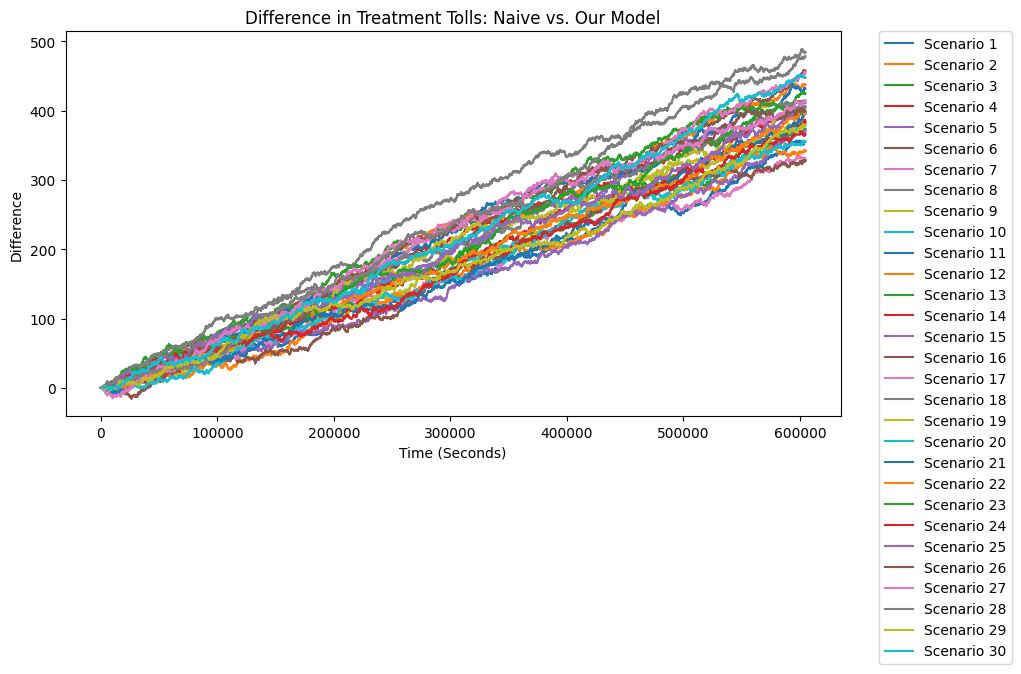

In [59]:
plt.figure(figsize=(10, 5))
for i in range(treatment_toll_diff.shape[0]):
    plt.plot(np.arange(t_length), treatment_toll_diff[i], label='Scenario '+str(i+1))
# Locate the legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel('Time (Seconds)')
plt.ylabel('Difference')
plt.title('Difference in Treatment Tolls: Naive vs. Our Model')
plt.savefig(f'treatment_toll_diff_{mode}.png', bbox_inches='tight')
plt.show()

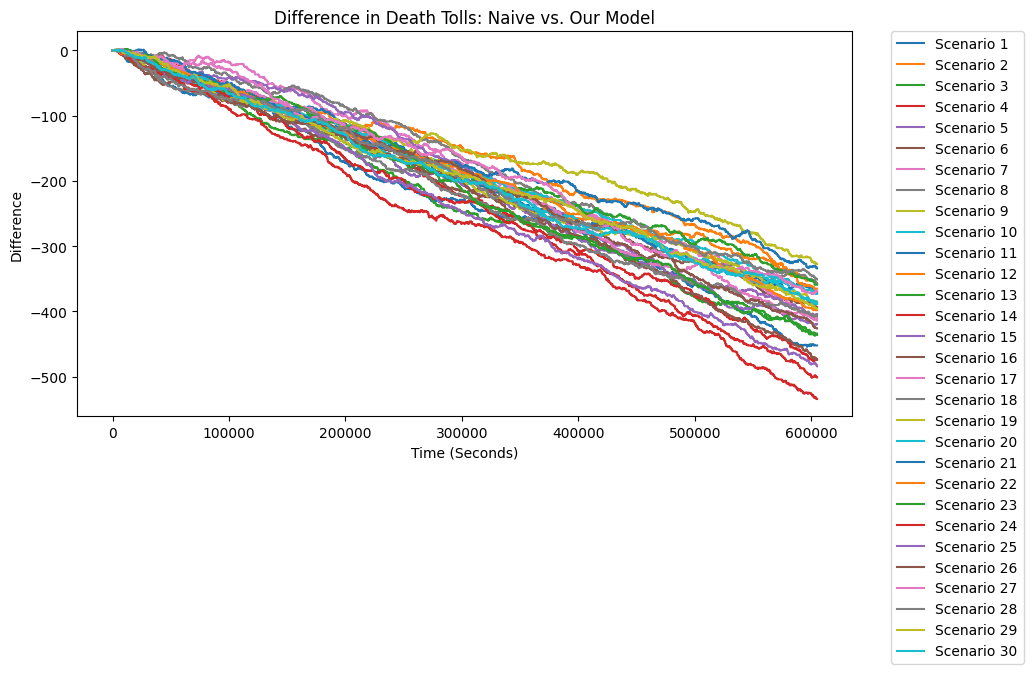

In [60]:
plt.figure(figsize=(10, 5))
for i in range(death_toll_diff.shape[0]):
    plt.plot(np.arange(t_length), death_toll_diff[i], label='Scenario '+str(i+1))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel('Time (Seconds)')
plt.ylabel('Difference')
plt.title('Difference in Death Tolls: Naive vs. Our Model')
plt.savefig(f'death_toll_diff_{mode}.png', bbox_inches='tight')
plt.show()

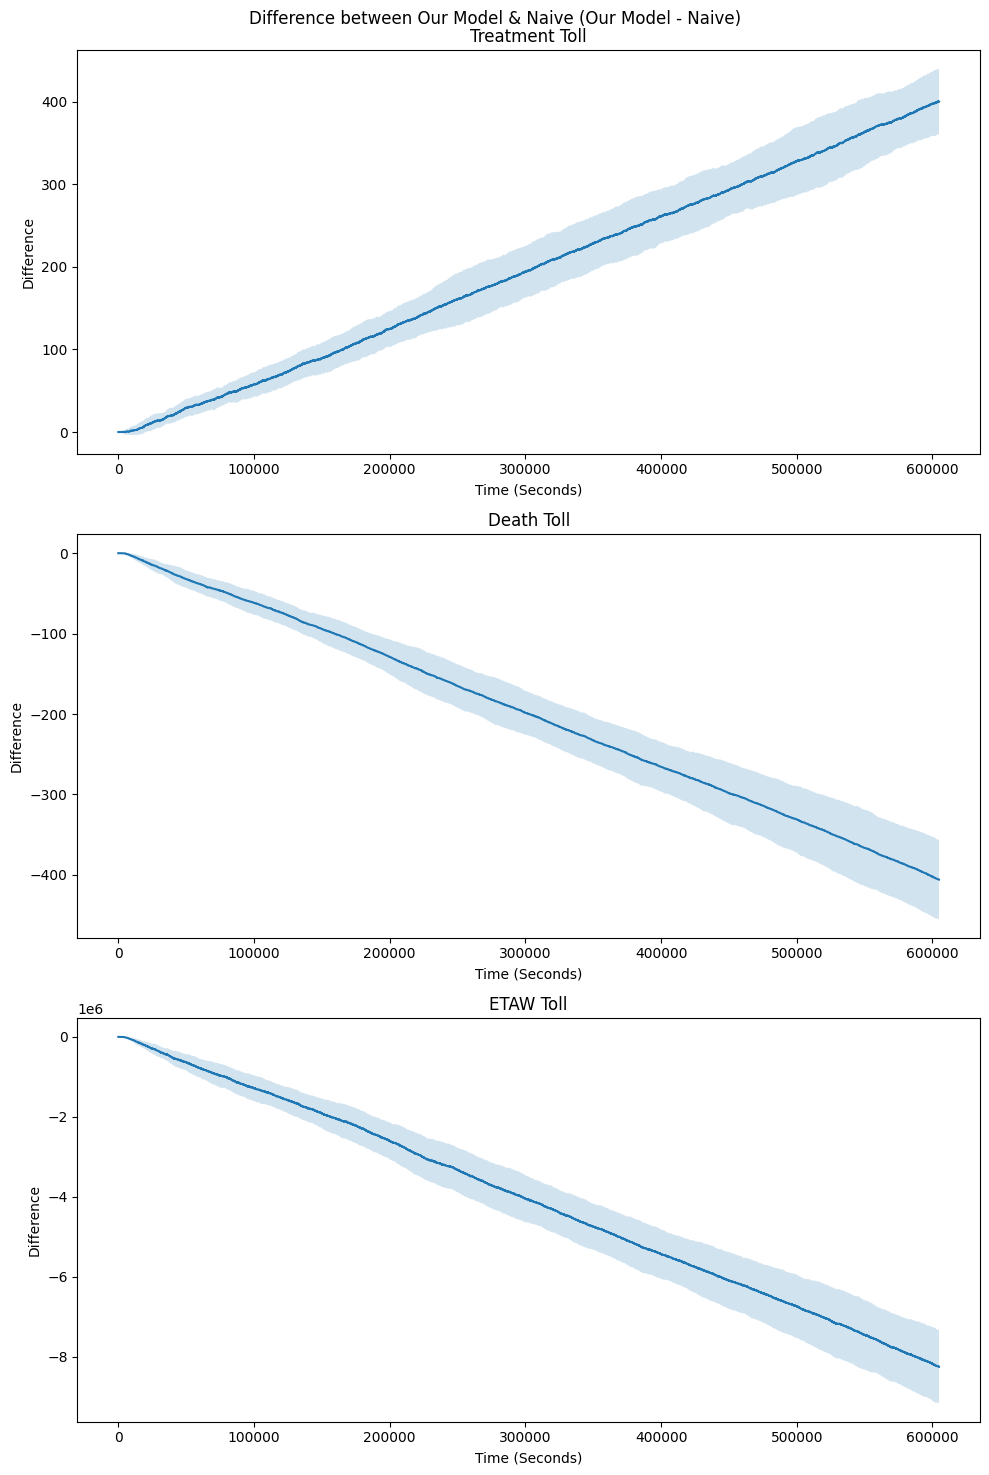

In [61]:
# Plot the difference with confidence interval
plt.figure(figsize=(10, 15))
plt.subplot(3, 1, 1)
plt.plot(treatment_toll_diff.mean(axis=0), label='Treatment toll')
plt.fill_between(np.arange(0, t_length), treatment_toll_diff.mean(axis=0) - treatment_toll_diff.std(axis=0),
                    treatment_toll_diff.mean(axis=0) + treatment_toll_diff.std(axis=0), alpha=0.2)
# plt.legend()
plt.xlabel('Time (Seconds)')
plt.ylabel('Difference')
plt.title('Treatment Toll')
plt.subplot(3, 1, 2)
plt.plot(death_toll_diff.mean(axis=0), label='Death toll')
plt.fill_between(np.arange(0, t_length), death_toll_diff.mean(axis=0) - death_toll_diff.std(axis=0),
                    death_toll_diff.mean(axis=0) + death_toll_diff.std(axis=0), alpha=0.2)
# plt.legend()
plt.xlabel('Time (Seconds)')
plt.ylabel('Difference')
plt.title('Death Toll')
plt.subplot(3, 1, 3)
plt.plot(etaw_toll_diff.mean(axis=0), label='ETAW toll')
plt.fill_between(np.arange(0, t_length), etaw_toll_diff.mean(axis=0) - etaw_toll_diff.std(axis=0),
                    etaw_toll_diff.mean(axis=0) + etaw_toll_diff.std(axis=0), alpha=0.2)
# plt.legend()
plt.xlabel('Time (Seconds)')
plt.ylabel('Difference')
plt.title('ETAW Toll')

plt.suptitle('Difference between Our Model & Naive (Our Model - Naive)')
plt.tight_layout()
plt.savefig(f'difference_{mode}.png')
plt.show()

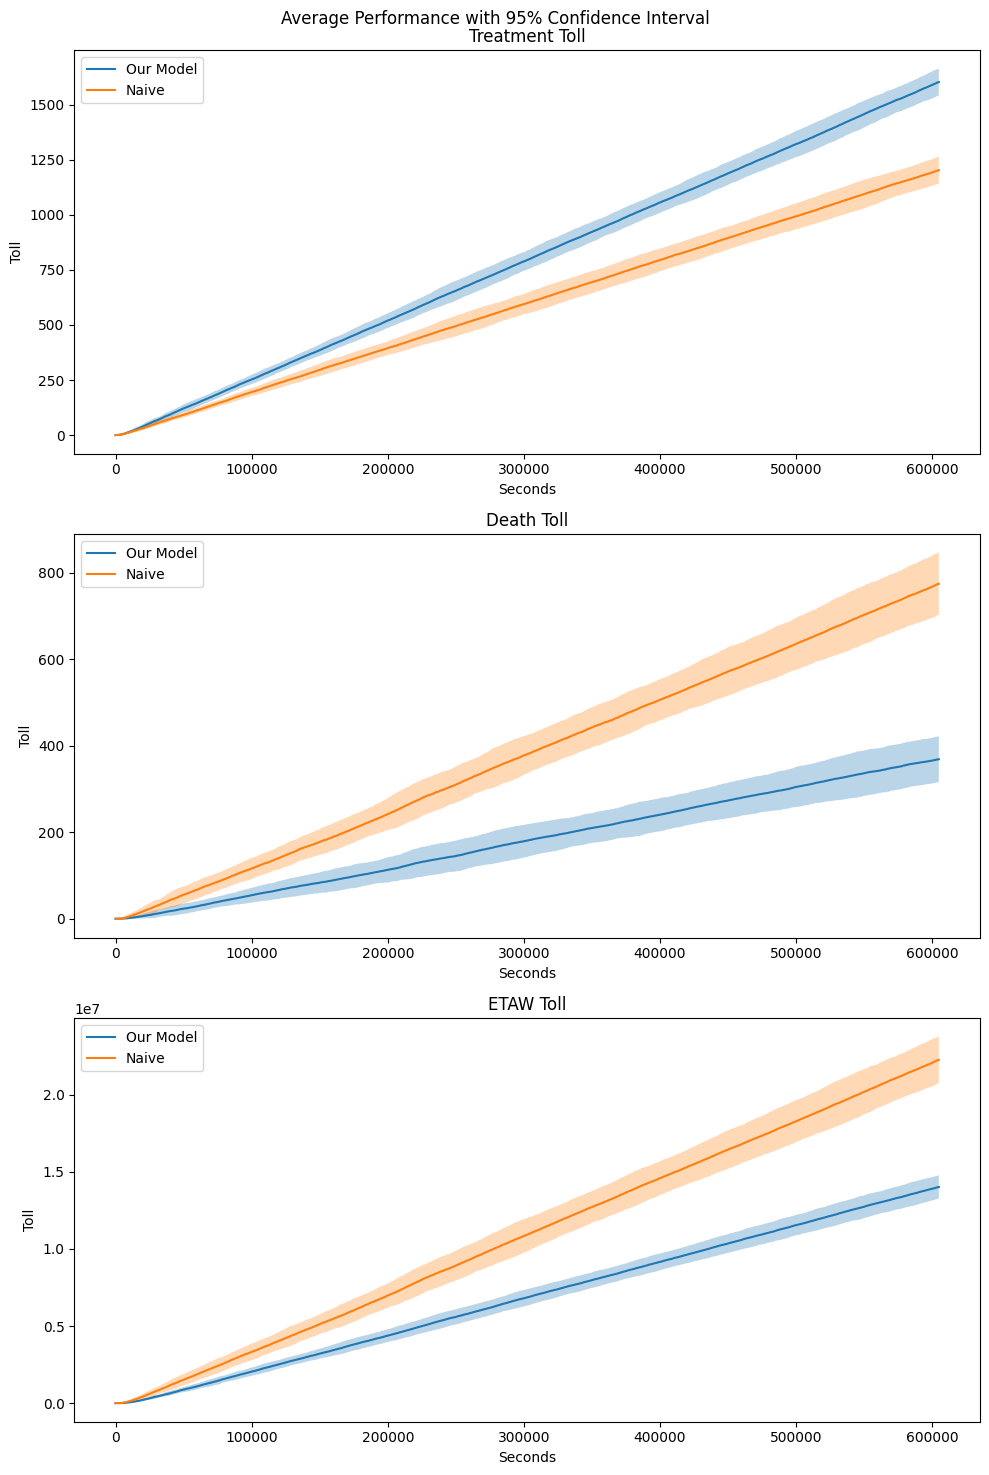

1603.5333333333333
1203.2333333333333
368.93333333333334
774.8666666666667
14021382.76869757
22268654.772482105


In [71]:
# Plot the graph: treatment_toll, death_toll, etaw_toll (with average & uppper, lower bounds)
# x legend: seconds
# y legend: toll


plt.figure(figsize=(10, 15))
plt.subplot(3, 1, 1)
plt.plot(np.mean(opt_treatment_toll, axis=0), label='Our Model')
plt.plot(np.mean(naive_treatment_toll, axis=0), label='Naive')
plt.fill_between(np.arange(t_length), np.mean(opt_treatment_toll, axis=0) - 1.96*np.std(opt_treatment_toll, axis=0),
                 np.mean(opt_treatment_toll, axis=0) + 1.96*np.std(opt_treatment_toll, axis=0), alpha=0.3)
plt.fill_between(np.arange(t_length), np.mean(naive_treatment_toll, axis=0) - 1.96*np.std(naive_treatment_toll, axis=0),
                    np.mean(naive_treatment_toll, axis=0) + 1.96*np.std(naive_treatment_toll, axis=0), alpha=0.3)
plt.xlabel('Seconds')
plt.ylabel('Toll')
plt.legend()
plt.title('Treatment Toll')
plt.subplot(3, 1, 2)
plt.plot(np.mean(opt_death_toll, axis=0), label='Our Model')
plt.plot(np.mean(naive_death_toll, axis=0), label='Naive')
plt.fill_between(np.arange(t_length), np.mean(opt_death_toll, axis=0) - 1.96*np.std(opt_death_toll, axis=0),
                 np.mean(opt_death_toll, axis=0) + 1.96*np.std(opt_death_toll, axis=0), alpha=0.3)
plt.fill_between(np.arange(t_length), np.mean(naive_death_toll, axis=0) - 1.96*np.std(naive_death_toll, axis=0),
                    np.mean(naive_death_toll, axis=0) + 1.96*np.std(naive_death_toll, axis=0), alpha=0.3)
plt.xlabel('Seconds')
plt.ylabel('Toll')
plt.legend()
plt.title('Death Toll')
plt.subplot(3, 1, 3)
plt.plot(np.mean(opt_etaw_toll, axis=0), label='Our Model')
plt.plot(np.mean(naive_etaw_toll, axis=0), label='Naive')
plt.fill_between(np.arange(t_length), np.mean(opt_etaw_toll, axis=0) - 1.96*np.std(opt_etaw_toll, axis=0),
                 np.mean(opt_etaw_toll, axis=0) + 1.96*np.std(opt_etaw_toll, axis=0), alpha=0.3)
plt.fill_between(np.arange(t_length), np.mean(naive_etaw_toll, axis=0) - 1.96*np.std(naive_etaw_toll, axis=0),
                    np.mean(naive_etaw_toll, axis=0) + 1.96*np.std(naive_etaw_toll, axis=0), alpha=0.3)
plt.xlabel('Seconds')
plt.ylabel('Toll')
plt.legend()
plt.title('ETAW Toll')

plt.suptitle('Average Performance with 95% Confidence Interval')
plt.tight_layout()
plt.savefig(f'metrics_{mode}.png')
plt.show()

#print average value of last time for each toll
print(np.mean(opt_treatment_toll, axis=0)[-1])
print(np.mean(naive_treatment_toll, axis=0)[-1])
print(np.mean(opt_death_toll, axis=0)[-1])
print(np.mean(naive_death_toll, axis=0)[-1])
print(np.mean(opt_etaw_toll, axis=0)[-1])
print(np.mean(naive_etaw_toll, axis=0)[-1])

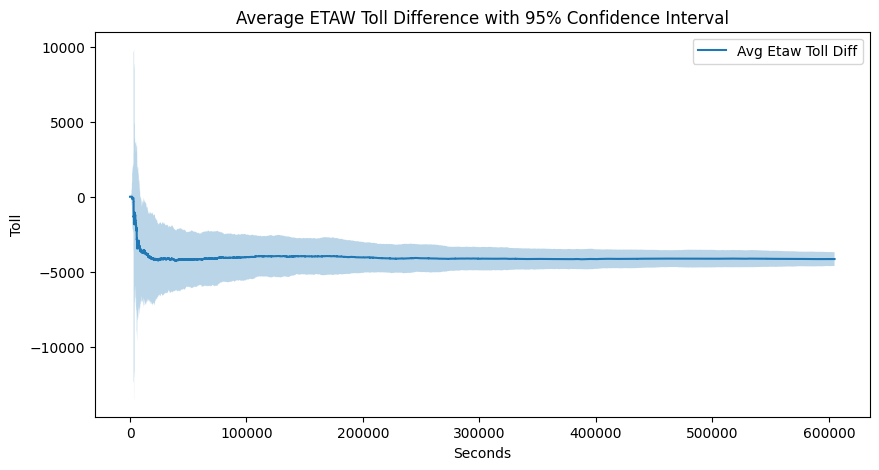

-4147.637331638094


In [73]:
# Plot the etaw_toll_diff_avg, etaw_toll_avg (with average & uppper, lower bounds)
# x legend: seconds
# y legend: toll

plt.figure(figsize=(10, 5))
plt.plot(np.mean(etaw_toll_diff_avg, axis=0), label='Avg Etaw Toll Diff')
plt.fill_between(np.arange(t_length), np.mean(etaw_toll_diff_avg, axis=0) - 1.96*np.std(etaw_toll_diff_avg, axis=0),
                 np.mean(etaw_toll_diff_avg, axis=0) + 1.96*np.std(etaw_toll_diff_avg, axis=0), alpha=0.3)
plt.xlabel('Seconds')
plt.ylabel('Toll')
plt.legend()
plt.title('Average ETAW Toll Difference with 95% Confidence Interval')
plt.savefig(f'etaw_toll_diff_avg_{mode}.png')
plt.show()
print(np.mean(etaw_toll_diff_avg, axis=0)[-1])

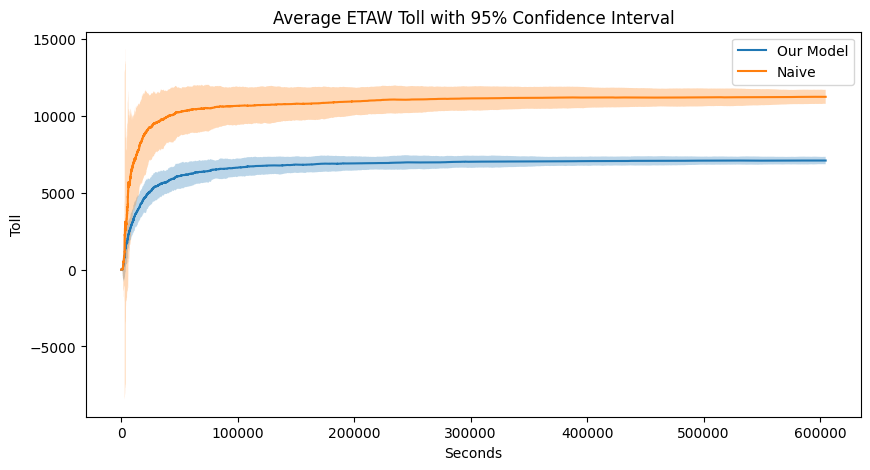

7108.840762520459
11256.478094158549


In [72]:
# Plot the etaw_toll_avg (with average & uppper, lower bounds)
# x legend: seconds
# y legend: toll

plt.figure(figsize=(10, 5))
plt.plot(np.mean(opt_etaw_toll_avg, axis=0), label='Our Model')
plt.plot(np.mean(naive_etaw_toll_avg, axis=0), label='Naive')
plt.fill_between(np.arange(t_length), np.mean(opt_etaw_toll_avg, axis=0) - 1.96*np.std(opt_etaw_toll_avg, axis=0),
                 np.mean(opt_etaw_toll_avg, axis=0) + 1.96*np.std(opt_etaw_toll_avg, axis=0), alpha=0.3)
plt.fill_between(np.arange(t_length), np.mean(naive_etaw_toll_avg, axis=0) - 1.96*np.std(naive_etaw_toll_avg, axis=0),
                    np.mean(naive_etaw_toll_avg, axis=0) + 1.96*np.std(naive_etaw_toll_avg, axis=0), alpha=0.3)
plt.xlabel('Seconds')
plt.ylabel('Toll')
plt.legend()
plt.title('Average ETAW Toll with 95% Confidence Interval')
plt.savefig(f'etaw_toll_avg_{mode}.png')
plt.show()

print(np.mean(opt_etaw_toll_avg, axis=0)[-1])
print(np.mean(naive_etaw_toll_avg, axis=0)[-1])

In [65]:
# Read the json file in the folder opt_etaw and naive_etaw
import json
opt_etaw = []
naive_etaw = []

# Get all the file names in the folder opt_etaw
opt_etaw_files = os.listdir('opt_etaw')
naive_etaw_files = os.listdir('naive_etaw')

# Read all the json files in the folder opt_etaw
for file in opt_etaw_files:
    if 'etaw' in file:
        opt_etaw.append(json.load(open('opt_etaw/'+file)))

# Read all the json files in the folder naive_etaw
for file in naive_etaw_files:
    if 'etaw' in file:
        naive_etaw.append(json.load(open('naive_etaw/'+file)))

In [66]:
# For each scenario in opt_etaw and naive_etaw, get the common keys
# and store them in a list
opt_etaw_keys = []
naive_etaw_keys = []
for i in range(len(opt_etaw)):
    opt_etaw_keys.append(list(opt_etaw[i].keys()))
    naive_etaw_keys.append(list(naive_etaw[i].keys()))

# Get the common keys between the same scenario in opt_etaw and naive_etaw
common_keys = []
for i in range(len(opt_etaw)):
    common_keys.append(list(set(opt_etaw_keys[i]).intersection(naive_etaw_keys[i])))
    common_keys[i].sort()

In [67]:
# Get the values of the common keys for each scenario in opt_etaw and naive_etaw
opt_etaw_values = []
naive_etaw_values = []
for i in range(len(opt_etaw)):
    opt_etaw_values.append([opt_etaw[i][key] for key in common_keys[i]])
    naive_etaw_values.append([naive_etaw[i][key] for key in common_keys[i]])

# Transform each list into a numpy array and then concatenate them
opt_etaw_values = np.concatenate(opt_etaw_values)
naive_etaw_values = np.concatenate(naive_etaw_values)

In [68]:
diff_etaw_values = opt_etaw_values - naive_etaw_values

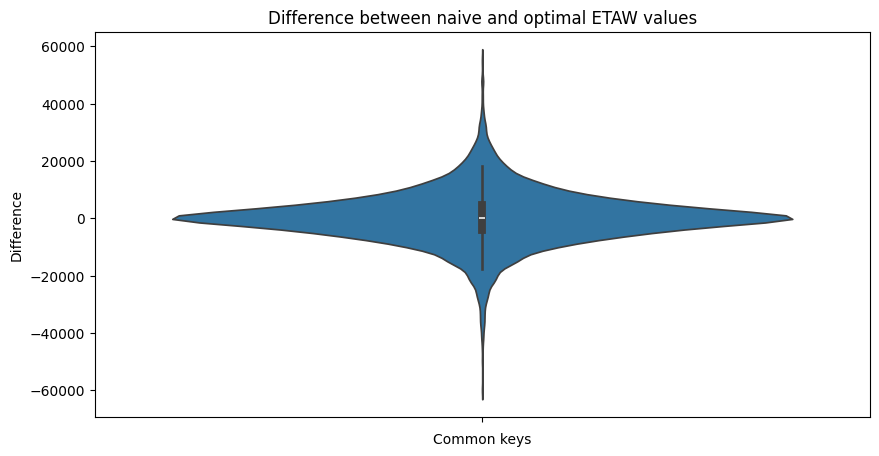

In [69]:
# Violin plot
plt.figure(figsize=(10, 5))
sns.violinplot(data=diff_etaw_values)
plt.xlabel('Common keys')
plt.ylabel('Difference')
plt.title('Difference between naive and optimal ETAW values')
plt.savefig(f'diff_etaw_values_{mode}.png')
plt.show()